In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import dataset as data

# stimulus_presentation_id

df = data.get_spike_info(stimulus_name='static_gratings')


In [3]:
df.to_csv('./allendata/df.csv')
df.columns

In [4]:
df.head()

,stimulus_condition_id,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,structure_acronym,stimulus_presentation_id,stimulus_block,start_time,...,phase,orientation,x_position,stimulus_name,y_position,size,spatial_frequency,frame,contrast,duration
unit_id,,,,,,,,,,,,,,,,,,,,,
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49434,8.0,5398.833208,...,0.25,0.0,null,static_gratings,null,"[250.0, 250.0]",0.04,null,0.8,0.250209
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49496,8.0,5414.346145,...,0.25,0.0,null,static_gratings,null,"[250.0, 250.0]",0.04,null,0.8,0.250196
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49523,8.0,5421.101799,...,0.25,0.0,null,static_gratings,null,"[250.0, 250.0]",0.04,null,0.8,0.250211
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49651,8.0,5453.128549,...,0.25,0.0,null,static_gratings,null,"[250.0, 250.0]",0.04,null,0.8,0.250211
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49772,8.0,5483.403835,...,0.25,0.0,null,static_gratings,null,"[250.0, 250.0]",0.04,null,0.8,0.250214


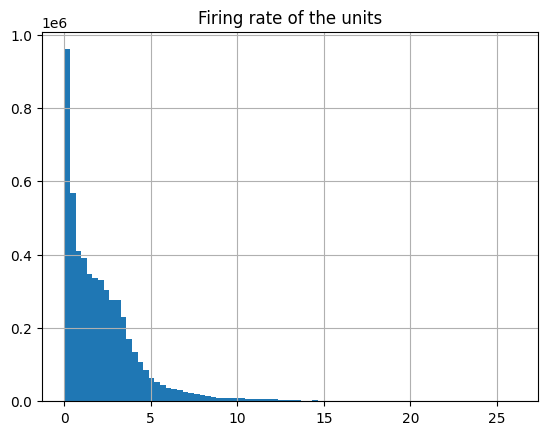

In [5]:
df['spike_mean'].hist(bins=80)
plt.title("Firing rate of the units")
plt.show()

In [6]:
import matplotlib.pyplot as plt

df_unit = df.groupby(level='unit_id')
units_df = pd.DataFrame(df.index.get_level_values('unit_id').unique(), columns=['unit_id'])

units_df['mean'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['spike_mean'].mean())
units_df['std'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['spike_mean'].std())

units_df['region'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['structure_acronym'].unique()[0])

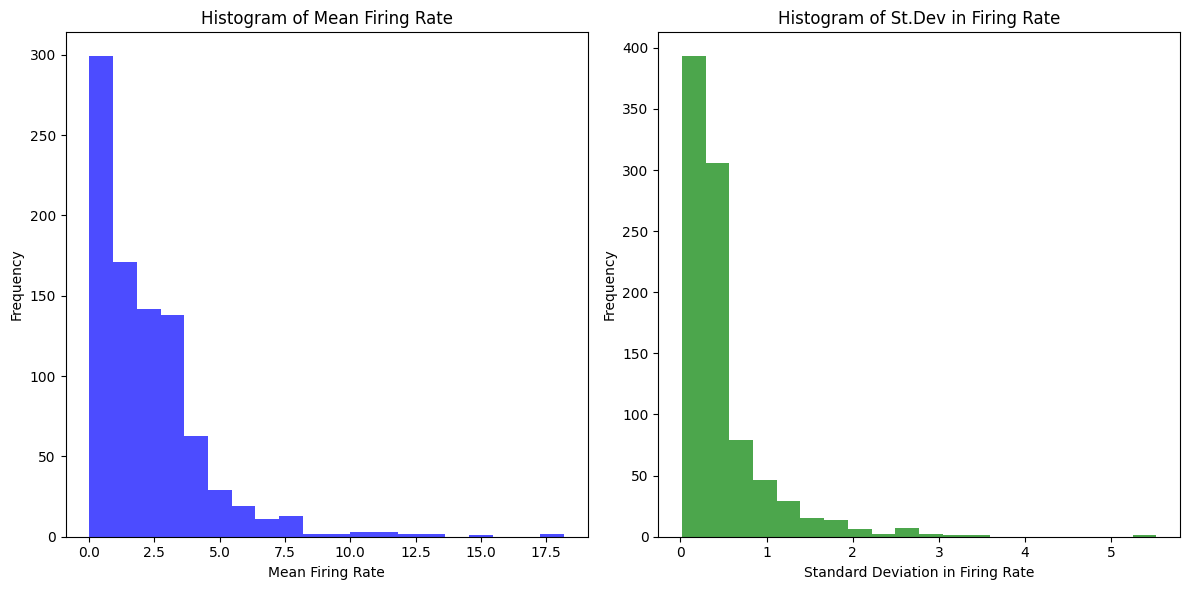

In [7]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'mean'
axes[0].hist(units_df['mean'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Mean Firing Rate')
axes[0].set_xlabel('Mean Firing Rate')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'var'
axes[1].hist(units_df['std'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of St.Dev in Firing Rate')
axes[1].set_xlabel('Standard Deviation in Firing Rate')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
units_df['region'].nunique()

13

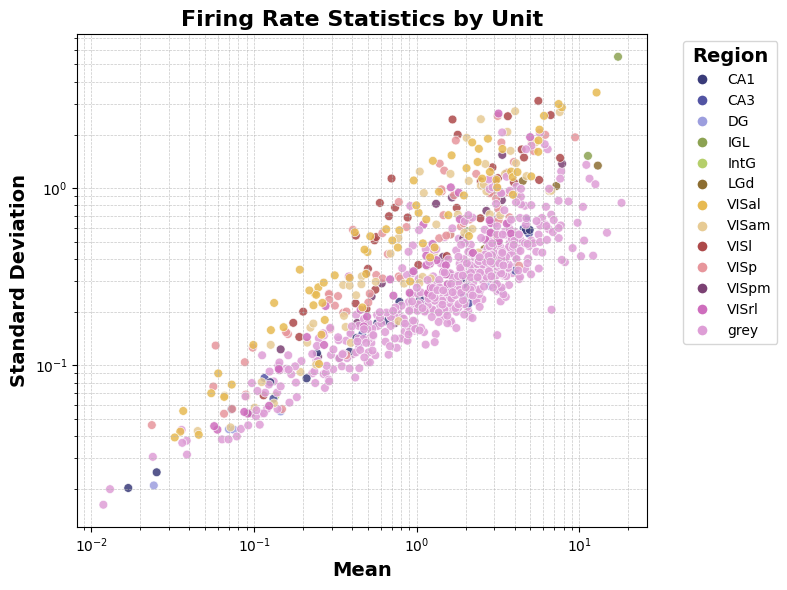

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.figure(figsize=(8, 6))

# Prepare categories
region_cats = units_df['region'].astype('category')
region_codes = region_cats.cat.codes
region_names = region_cats.cat.categories

# Use a categorical colormap
cmap = plt.cm.get_cmap('tab20b', len(region_names))  # tab20b has distinct colors

# Create scatter plot
scatter = plt.scatter(units_df['mean'], units_df['std'],
                      s=40, c=region_codes,
                      cmap=cmap, alpha=0.85, edgecolors='w', linewidth=0.5,
                      vmin=0, vmax=len(region_names)-1)  # Explicit colormap normalization

# Set log scales and labels
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean', fontsize=14, fontweight='bold')
plt.ylabel('Standard Deviation', fontsize=14, fontweight='bold')
plt.title('Firing Rate Statistics by Unit', fontsize=16, fontweight='bold')

# Create custom legend with discrete colors and region names
handles = [Line2D([0], [0], marker='o', color='w',
                  markerfacecolor=cmap(i / (len(region_names)-1)),  # Normalize to color codes
                  markersize=8, label=region)
           for i, region in enumerate(region_names)]

# Add legend
legend = plt.legend(handles=handles, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=14)
legend.get_title().set_fontweight('bold')

# Display grid and minor ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


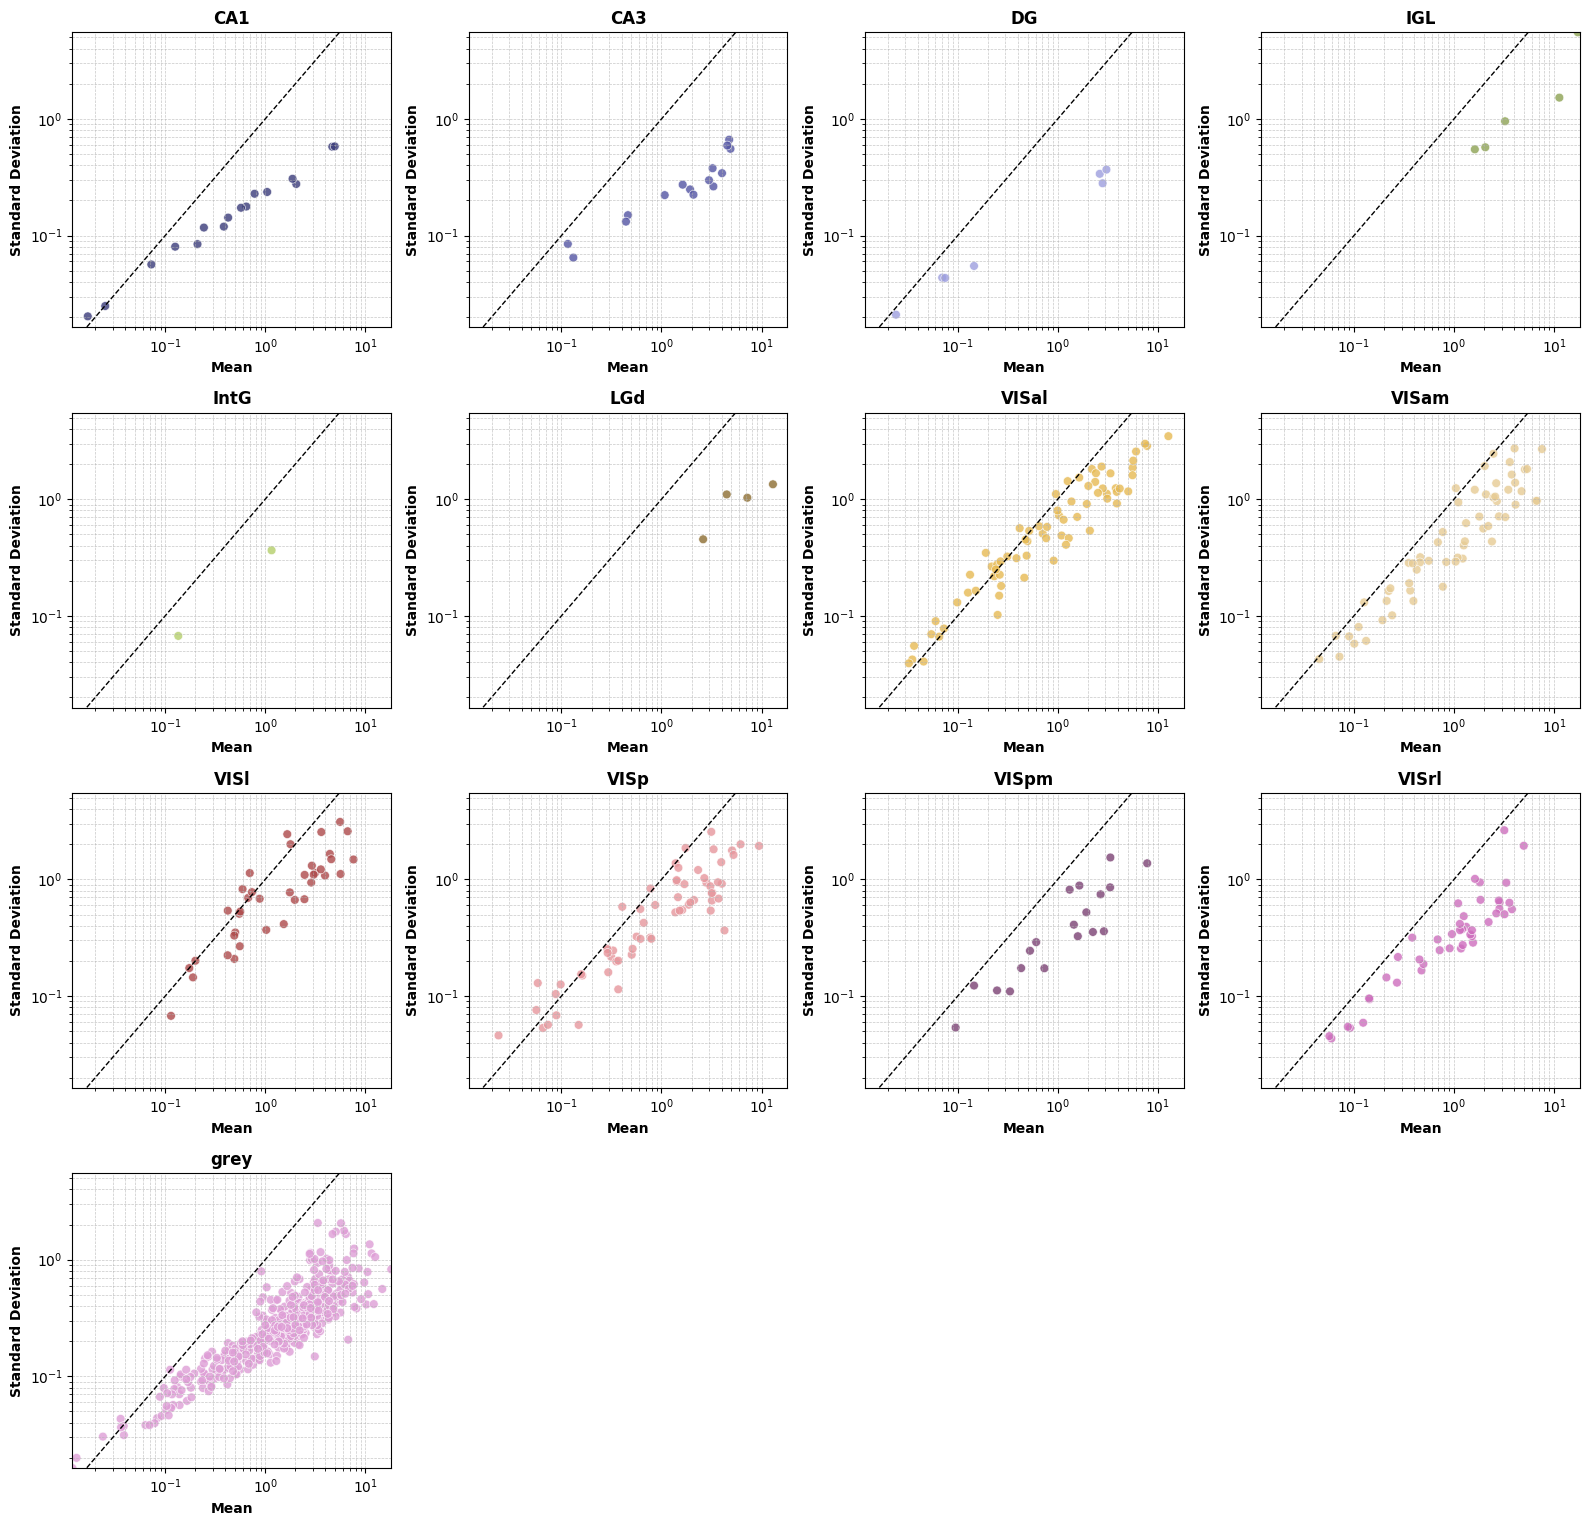

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare categories
region_cats = units_df['region'].astype('category')
region_codes = region_cats.cat.codes
region_names = region_cats.cat.categories

# Set up the figure
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

# Use the categorical colormap
cmap = plt.cm.get_cmap('tab20b', len(region_names))

# For each region, plot in its own subplot
for i, region in enumerate(region_names):
    ax = axes[i]
    region_mask = (units_df['region'] == region)

    # Plot points, colored by global region codes
    sc = ax.scatter(units_df.loc[region_mask, 'mean'],
                    units_df.loc[region_mask, 'std'],
                    s=40,
                    c=region_codes[region_mask],  # Pass the region codes directly
                    cmap=cmap,
                    vmin=0, vmax=len(region_names)-1,  # Normalize across ALL regions
                    alpha=0.8, edgecolors='w', linewidth=0.5)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(region, fontsize=12, fontweight='bold')
    ax.set_xlabel('Mean', fontsize=10, fontweight='bold')
    ax.set_ylabel('Standard Deviation', fontsize=10, fontweight='bold')
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.minorticks_on()

    # Set consistent axis limits
    ax.set_xlim(units_df['mean'].min(), units_df['mean'].max())
    ax.set_ylim(units_df['std'].min(), units_df['std'].max())

    # Plot y=x line on the log-log scale
    x_vals = np.linspace(units_df['mean'].min(), units_df['mean'].max(), 100)
    ax.plot(x_vals, x_vals, color='k', linestyle='--', linewidth=1)  # y = x line

# Hide any empty subplots (the last 3)
for j in range(len(region_names), 16):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()


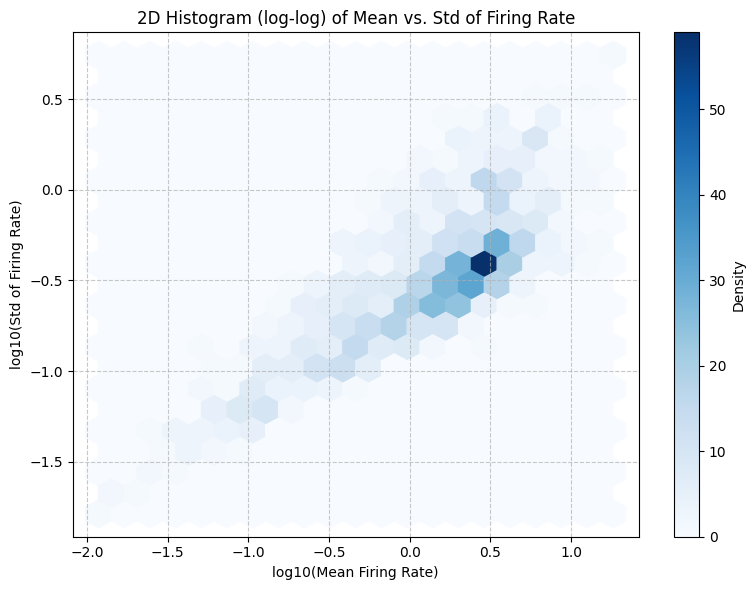

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Log-transform mean and std (log10)
log_mean = np.log10(units_df['mean'])
log_std = np.log10(units_df['std'])

# Create 2D hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(log_mean, log_std, gridsize=20, cmap='Blues')

# Add color bar to indicate density
plt.colorbar(label='Density')

# Set labels and title
plt.xlabel('log10(Mean Firing Rate)')
plt.ylabel('log10(Std of Firing Rate)')
plt.title('2D Histogram (log-log) of Mean vs. Std of Firing Rate')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [49]:
print(f'There are {df.index.get_level_values("unit_id").nunique()} unique units in total')

There are 902 unique units in total
